## Name: Uttam Mahata
## Enrollment No: 2022CSB104

# Breast Cancer Classification Using Neural Network

In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 

## Load Dataset

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# metadata 
print(breast_cancer.metadata) 
  
# variable information 
print(breast_cancer.variables) 


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [4]:

Merge = pd.concat([X, y], axis=1)
Merge.to_csv('breast_cancer.csv', index=False)

In [5]:
data = pd.read_csv('breast_cancer.csv')

In [6]:
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [7]:
data.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [8]:
data.shape

(286, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [10]:
data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [11]:
data.dtypes

age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
Class          object
dtype: object

In [12]:
# Filling missing values in 'node-caps' and 'breast-quad' with the mode (most frequent value)
data['node-caps'].fillna(data['node-caps'].mode()[0], inplace=True)
data['breast-quad'].fillna(data['breast-quad'].mode()[0], inplace=True)


/tmp/ipykernel_35971/2738075337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['node-caps'].fillna(data['node-caps'].mode()[0], inplace=True)
/tmp/ipykernel_35971/2738075337.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [13]:
data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [14]:
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [22]:
# Checking for numeric columns
numeric_features = data.select_dtypes(include=[np.number]).columns
print(numeric_features)


Index(['deg-malig'], dtype='object')


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('breast_cancer.csv')

# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True, dtype=int)

# Separate features and target
X = data_encoded.drop('Class_recurrence-events', axis=1)  # Class column is the target
y = data_encoded['Class_recurrence-events']

# Identify numeric columns for scaling
numeric_features = ['deg-malig']
categorical_features = X.columns.difference(numeric_features)

# Scale only the numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Re-combine numeric and categorical data (already encoded by get_dummies)
X_scaled = X[categorical_features].join(X[numeric_features])

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

(200, 31) (86, 31) (200,) (86,)
Epoch 0, Error: 0.19832448960390386
Epoch 100, Error: 0.11797128324639945
Epoch 200, Error: 0.11130950568357045
Epoch 300, Error: 0.10680184774073406
Epoch 400, Error: 0.10332787043701484
Epoch 500, Error: 0.10057371775170637
Epoch 600, Error: 0.09832318793033501
Epoch 700, Error: 0.09643510758781774
Epoch 800, Error: 0.09481833061814479
Epoch 900, Error: 0.09341255951559259


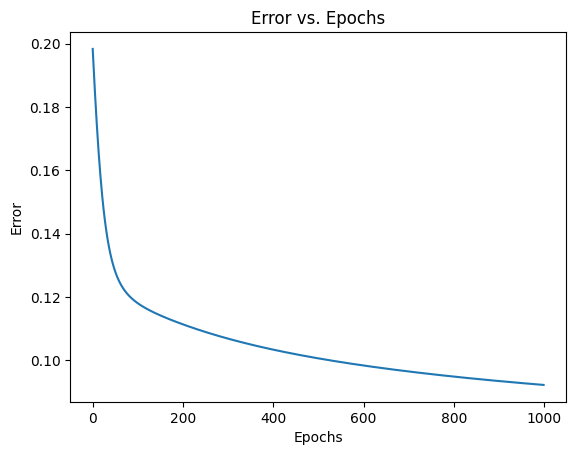

Confusion Matrix:
 [[51  8]
 [22  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77        59
           1       0.38      0.19      0.25        27

    accuracy                           0.65        86
   macro avg       0.54      0.52      0.51        86
weighted avg       0.60      0.65      0.61        86



In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
data = pd.read_csv('breast_cancer.csv')

# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True, dtype=int)

# Separate features and target
X = data_encoded.drop('Class_recurrence-events', axis=1)  # Class column is the target
y = data_encoded['Class_recurrence-events']


# Identify numeric columns for scaling
numeric_features = ['deg-malig']
categorical_features = X.columns.difference(numeric_features)

# Scale only the numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Re-combine numeric and categorical data (already encoded by get_dummies)
X_scaled = X[categorical_features].join(X[numeric_features])

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Hyperparameters
learning_rate = 0.001
epochs = 1000  # Number of iterations
errors = []

# Sigmoid activation function
def sigmoid(z):
    # Ensure z is a numpy array with correct dtype
    z = np.array(z, dtype=np.float64)
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function
def sigmoid_derivative(z):
    return z * (1 - z)

# Initialize weights and biases
input_layer_neurons = X_train.shape[1]  # Number of features
hidden_layer_neurons = 10  # Arbitrary number of neurons in hidden layer
output_neurons = 1  # Output layer

# Randomly initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_layer_neurons, hidden_layer_neurons)
bias_hidden = np.random.randn(1, hidden_layer_neurons)
weights_hidden_output = np.random.randn(hidden_layer_neurons, output_neurons)
bias_output = np.random.randn(1, output_neurons) 

# Error calculation (Mean Squared Error)
def compute_error(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred) ** 2)

# Forward propagation function
def forward_propagation(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    # Input to hidden layer
    z_hidden = np.dot(X, weights_input_hidden) + bias_hidden
    a_hidden = sigmoid(z_hidden)
    
    # Hidden layer to output layer
    z_output = np.dot(a_hidden, weights_hidden_output) + bias_output
    a_output = sigmoid(z_output)
    
    return z_hidden, a_hidden, z_output, a_output

# Backpropagation function to update weights and biases
def backpropagation(X, y, z_hidden, a_hidden, z_output, a_output):
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output
    
    # Calculate output error
    error_output = a_output - y
    d_output = error_output * sigmoid_derivative(a_output)
    
    # Calculate hidden layer error
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(a_hidden)
    
    # Update weights and biases
    weights_hidden_output -= learning_rate * a_hidden.T.dot(d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    
    weights_input_hidden -= learning_rate * X.T.dot(d_hidden)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

# Training the neural network
for epoch in range(epochs):
    # Forward propagation
    z_hidden, a_hidden, z_output, a_output = forward_propagation(X_train.values, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    
    # Compute error
    error = compute_error(y_train.values.reshape(-1, 1), a_output)
    errors.append(error)
    
    # Backpropagation to update weights and biases
    backpropagation(X_train.values, y_train.values.reshape(-1, 1), z_hidden, a_hidden, z_output, a_output)
    
    # Print error for every 100th epoch
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Error: {error}")

# Plotting Error vs. Epochs curve
plt.plot(errors)
plt.title('Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Testing the neural network
_, _, _, a_output_test = forward_propagation(X_test.values, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
y_pred = np.round(a_output_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


### K-Fold Cross Validation

Fold 1:
Accuracy: 0.5517
Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.86      0.71        37
        True       0.00      0.00      0.00        21

    accuracy                           0.55        58
   macro avg       0.30      0.43      0.36        58
weighted avg       0.39      0.55      0.45        58

Confusion Matrix:
 [[32  5]
 [21  0]]


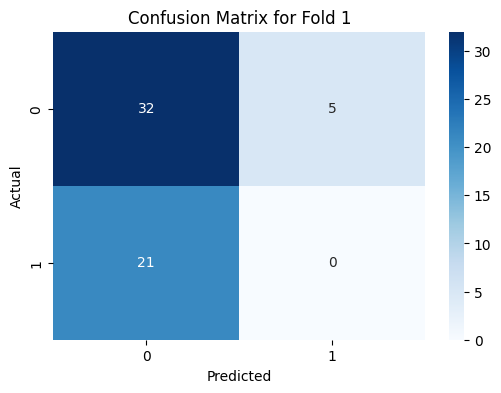

Fold 2:
Accuracy: 0.7193
Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.93      0.83        42
        True       0.40      0.13      0.20        15

    accuracy                           0.72        57
   macro avg       0.57      0.53      0.51        57
weighted avg       0.66      0.72      0.66        57

Confusion Matrix:
 [[39  3]
 [13  2]]


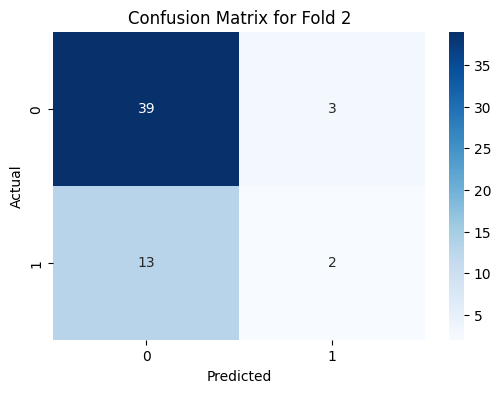

Fold 3:
Accuracy: 0.7368
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.93      0.84        42
        True       0.50      0.20      0.29        15

    accuracy                           0.74        57
   macro avg       0.63      0.56      0.56        57
weighted avg       0.70      0.74      0.69        57

Confusion Matrix:
 [[39  3]
 [12  3]]


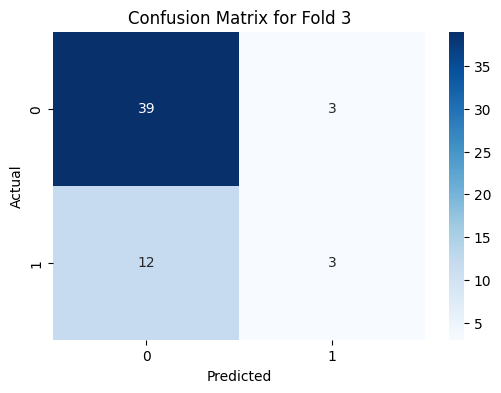

Fold 4:
Accuracy: 0.5965
Classification Report:
               precision    recall  f1-score   support

       False       0.64      0.89      0.75        38
        True       0.00      0.00      0.00        19

    accuracy                           0.60        57
   macro avg       0.32      0.45      0.37        57
weighted avg       0.43      0.60      0.50        57

Confusion Matrix:
 [[34  4]
 [19  0]]


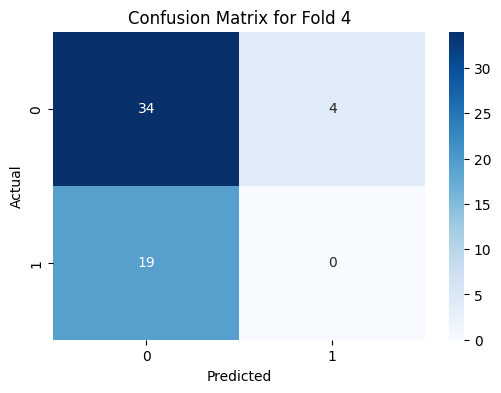

Fold 5:
Accuracy: 0.7193
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.90      0.83        42
        True       0.43      0.20      0.27        15

    accuracy                           0.72        57
   macro avg       0.59      0.55      0.55        57
weighted avg       0.67      0.72      0.68        57

Confusion Matrix:
 [[38  4]
 [12  3]]


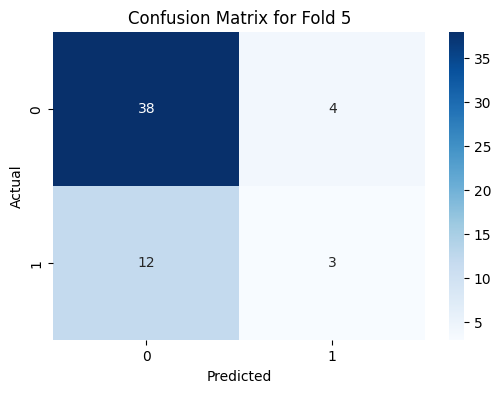

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('breast_cancer.csv')

# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data_encoded.drop('Class_recurrence-events', axis=1)  # Class column is the target
y = data_encoded['Class_recurrence-events']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function
def sigmoid_derivative(z):
    return z * (1 - z)

# Initialize weights and biases
def initialize_parameters(input_layer_neurons, hidden_layer_neurons, output_neurons):
    np.random.seed(42)
    weights_input_hidden = np.random.randn(input_layer_neurons, hidden_layer_neurons)
    bias_hidden = np.random.randn(1, hidden_layer_neurons)
    weights_hidden_output = np.random.randn(hidden_layer_neurons, output_neurons)
    bias_output = np.random.randn(1, output_neurons)
    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

# Forward propagation function
def forward_propagation(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    # Input to hidden layer
    z_hidden = np.dot(X, weights_input_hidden) + bias_hidden
    a_hidden = sigmoid(z_hidden)
    
    # Hidden layer to output layer
    z_output = np.dot(a_hidden, weights_hidden_output) + bias_output
    a_output = sigmoid(z_output)
    
    return z_hidden, a_hidden, z_output, a_output

# Error calculation (Mean Squared Error)
def compute_error(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred) ** 2)

# Backpropagation function to update weights and biases
def backpropagation(X, y, z_hidden, a_hidden, z_output, a_output, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate):
    # Calculate output error
    error_output = a_output - y
    d_output = error_output * sigmoid_derivative(a_output)
    
    # Calculate hidden layer error
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(a_hidden)
    
    # Update weights and biases
    weights_hidden_output -= learning_rate * a_hidden.T.dot(d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    
    weights_input_hidden -= learning_rate * X.T.dot(d_hidden)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)
    
    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

# K-Fold Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameters
input_layer_neurons = X_scaled.shape[1]  # Number of features
hidden_layer_neurons = 10  # Arbitrary number of neurons in hidden layer
output_neurons = 1  # Output layer
learning_rate = 0.001
epochs = 500

# Cross-validation loop
fold = 1
for train_index, test_index in kf.split(X_scaled):
    print(f"Fold {fold}:")

    # Split the data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize parameters for each fold
    weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = initialize_parameters(input_layer_neurons, hidden_layer_neurons, output_neurons)

    # Training the neural network
    errors = []
    for epoch in range(epochs):
        # Forward propagation
        z_hidden, a_hidden, z_output, a_output = forward_propagation(X_train, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
        
        # Compute error
        error = compute_error(y_train.values.reshape(-1, 1), a_output)
        errors.append(error)
        
        # Backpropagation to update weights and biases
        weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = backpropagation(X_train, y_train.values.reshape(-1, 1), z_hidden, a_hidden, z_output, a_output, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate)

    # Testing the neural network
    _, _, _, a_output_test = forward_propagation(X_test, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    y_pred = np.round(a_output_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fold += 1

### Shuffled Rows of the Dataset

Fold 1:
Accuracy: 0.6897
Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.90      0.80        41
        True       0.43      0.18      0.25        17

    accuracy                           0.69        58
   macro avg       0.58      0.54      0.53        58
weighted avg       0.64      0.69      0.64        58

Confusion Matrix:
 [[37  4]
 [14  3]]


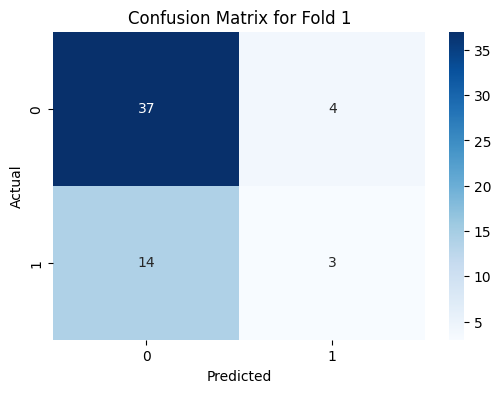

Fold 2:
Accuracy: 0.6842
Classification Report:
               precision    recall  f1-score   support

       False       0.72      0.93      0.81        41
        True       0.25      0.06      0.10        16

    accuracy                           0.68        57
   macro avg       0.48      0.49      0.45        57
weighted avg       0.59      0.68      0.61        57

Confusion Matrix:
 [[38  3]
 [15  1]]


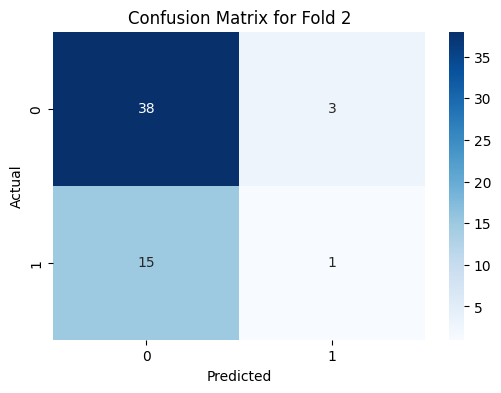

Fold 3:
Accuracy: 0.7368
Classification Report:
               precision    recall  f1-score   support

       False       0.73      1.00      0.84        40
        True       1.00      0.12      0.21        17

    accuracy                           0.74        57
   macro avg       0.86      0.56      0.53        57
weighted avg       0.81      0.74      0.65        57

Confusion Matrix:
 [[40  0]
 [15  2]]


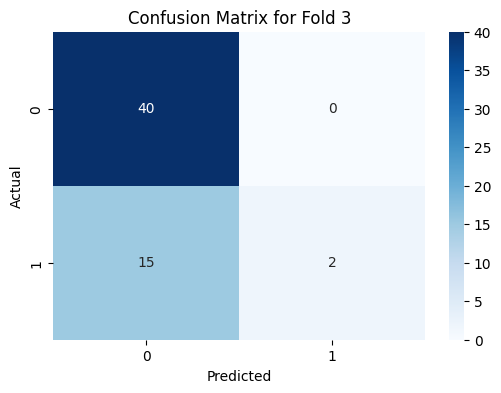

Fold 4:
Accuracy: 0.5965
Classification Report:
               precision    recall  f1-score   support

       False       0.66      0.85      0.74        39
        True       0.14      0.06      0.08        18

    accuracy                           0.60        57
   macro avg       0.40      0.45      0.41        57
weighted avg       0.50      0.60      0.53        57

Confusion Matrix:
 [[33  6]
 [17  1]]


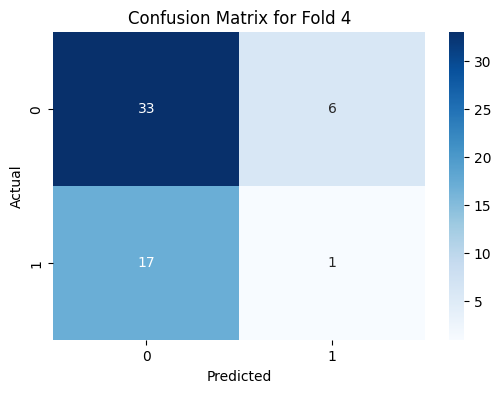

Fold 5:
Accuracy: 0.6842
Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.85      0.79        40
        True       0.45      0.29      0.36        17

    accuracy                           0.68        57
   macro avg       0.60      0.57      0.57        57
weighted avg       0.65      0.68      0.66        57

Confusion Matrix:
 [[34  6]
 [12  5]]


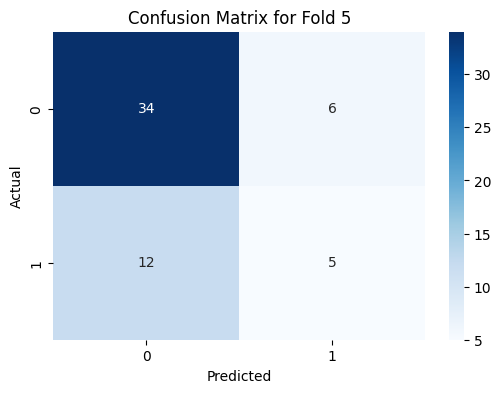

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('breast_cancer.csv')

# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data_encoded.drop('Class_recurrence-events', axis=1)  # Class column is the target
y = data_encoded['Class_recurrence-events']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Shuffle the rows of the dataset after scaling
shuffled_indices = np.random.permutation(len(X_scaled))
X_scaled = X_scaled[shuffled_indices]
y = y.values[shuffled_indices]  # Shuffle the target variable accordingly

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function
def sigmoid_derivative(z):
    return z * (1 - z)

# Initialize weights and biases
def initialize_parameters(input_layer_neurons, hidden_layer_neurons, output_neurons):
    np.random.seed(42)
    weights_input_hidden = np.random.randn(input_layer_neurons, hidden_layer_neurons)
    bias_hidden = np.random.randn(1, hidden_layer_neurons)
    weights_hidden_output = np.random.randn(hidden_layer_neurons, output_neurons)
    bias_output = np.random.randn(1, output_neurons)
    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

# Forward propagation function
def forward_propagation(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    # Input to hidden layer
    z_hidden = np.dot(X, weights_input_hidden) + bias_hidden
    a_hidden = sigmoid(z_hidden)
    
    # Hidden layer to output layer
    z_output = np.dot(a_hidden, weights_hidden_output) + bias_output
    a_output = sigmoid(z_output)
    
    return z_hidden, a_hidden, z_output, a_output

# Error calculation (Mean Squared Error)
def compute_error(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred) ** 2)

# Backpropagation function to update weights and biases
def backpropagation(X, y, z_hidden, a_hidden, z_output, a_output, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate):
    # Calculate output error
    error_output = a_output - y
    d_output = error_output * sigmoid_derivative(a_output)
    
    # Calculate hidden layer error
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(a_hidden)
    
    # Update weights and biases
    weights_hidden_output -= learning_rate * a_hidden.T.dot(d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    
    weights_input_hidden -= learning_rate * X.T.dot(d_hidden)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)
    
    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

# K-Fold Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameters
input_layer_neurons = X_scaled.shape[1]  # Number of features
hidden_layer_neurons = 10  # Arbitrary number of neurons in hidden layer
output_neurons = 1  # Output layer
learning_rate = 0.001
epochs = 500

# Cross-validation loop
fold = 1
for train_index, test_index in kf.split(X_scaled):
    print(f"Fold {fold}:")

    # Split the data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize parameters for each fold
    weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = initialize_parameters(input_layer_neurons, hidden_layer_neurons, output_neurons)

    # Training the neural network
    errors = []
    for epoch in range(epochs):
        # Forward propagation
        z_hidden, a_hidden, z_output, a_output = forward_propagation(X_train, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
        
        # Compute error
        error = compute_error(y_train.reshape(-1, 1), a_output)
        errors.append(error)
        
        # Backpropagation to update weights and biases
        weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = backpropagation(X_train, y_train.reshape(-1, 1), z_hidden, a_hidden, z_output, a_output, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate)

    # Testing the neural network
    _, _, _, a_output_test = forward_propagation(X_test, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    y_pred = np.round(a_output_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fold += 1


(200, 31) (86, 31) (200,) (86,)
Epoch 0, Error: 0.19832448960390386
Epoch 100, Error: 0.11797128324639945
Epoch 200, Error: 0.11130950568357045
Epoch 300, Error: 0.10680184774073406
Epoch 400, Error: 0.10332787043701484
Epoch 500, Error: 0.10057371775170637
Epoch 600, Error: 0.09832318793033501
Epoch 700, Error: 0.09643510758781774
Epoch 800, Error: 0.09481833061814479
Epoch 900, Error: 0.09341255951559259


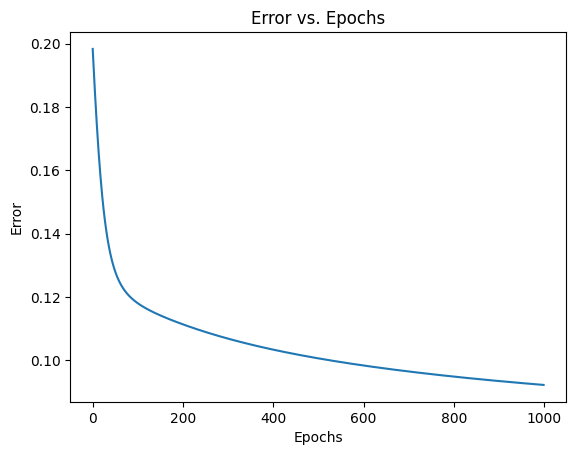

Confusion Matrix:
 [[51  8]
 [22  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77        59
           1       0.38      0.19      0.25        27

    accuracy                           0.65        86
   macro avg       0.54      0.52      0.51        86
weighted avg       0.60      0.65      0.61        86

